In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("DataGT.csv")
df

,Year,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,1995,-1.0,-1.0,-1.0,-1.00,60.800000,39.029553,88.900000,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.4,38.6,37.4,1400.0
1,1996,-1.0,-1.0,-1.0,-1.00,67.679939,48.340508,92.304756,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,38.1,1500.0
2,1997,-1.0,-1.0,-1.0,-1.00,68.904076,50.095980,92.530144,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,38.8,1600.0
3,1998,-1.0,-1.0,-1.0,-1.00,70.124130,51.876376,92.736572,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,39.5,1600.0
4,1999,-1.0,-1.0,-1.0,-1.00,70.900000,54.212460,91.300000,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.3,34.3,40.2,1600.0
5,2000,-1.0,40.7,17.1,66.75,73.318205,55.009254,95.397837,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,40.9,1500.0
6,2001,-1.0,39.9,16.2,65.70,73.733215,57.331640,93.246452,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,41.6,1400.0
7,2002,64.0,39.2,15.3,64.80,78.667838,64.146689,95.710971,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,42.1,1200.0
8,2003,-1.0,38.7,14.6,64.00,78.512204,63.396697,96.030896,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,42.6,1100.0
9,2004,-1.0,38.3,13.9,63.40,77.151161,62.675712,93.728249,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,42.4,1000.0


In [3]:
df.head()

,Year,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,1995,-1.0,-1.0,-1.0,-1.0,60.800000,39.029553,88.900000,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.4,38.6,37.4,1400.0
1,1996,-1.0,-1.0,-1.0,-1.0,67.679939,48.340508,92.304756,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,38.1,1500.0
2,1997,-1.0,-1.0,-1.0,-1.0,68.904076,50.095980,92.530144,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,38.8,1600.0
3,1998,-1.0,-1.0,-1.0,-1.0,70.124130,51.876376,92.736572,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,39.5,1600.0
4,1999,-1.0,-1.0,-1.0,-1.0,70.900000,54.212460,91.300000,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.3,34.3,40.2,1600.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 1487 entries, Year to Young people (ages 15-24) newly infected with HIV
dtypes: float64(1486), int64(1)
memory usage: 313.8 KB


In [5]:
df.describe()

,Year,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.00000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2008.000000,3.370370,33.218519,10.203704,53.485185,82.075366,71.064436,94.792836,3.102963,2.532222,...,-0.555556,-0.840741,-0.807407,-0.82963,-0.681481,-0.874074,0.070370,2.903704,40.855556,755.555556
std,7.937254,15.833626,16.889483,5.637203,26.662051,9.754628,15.861724,2.048030,12.275258,10.864346,...,2.309401,0.827535,1.000740,0.88527,1.655071,0.654330,3.143713,11.322288,1.211272,574.679398
min,1995.000000,-1.000000,-1.000000,-1.000000,-1.000000,60.800000,39.029553,88.900000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,37.400000,100.000000
25%,2001.500000,-1.000000,37.800000,11.550000,62.250000,75.442188,60.003676,93.822632,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,40.700000,200.000000
50%,2008.000000,-1.000000,39.100000,11.900000,64.000000,83.113136,72.185747,94.901924,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,41.000000,500.000000
75%,2014.500000,-1.000000,41.750000,12.600000,66.825000,89.305984,82.500051,96.243403,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,41.500000,1300.000000
max,2021.000000,64.000000,48.100000,17.100000,73.350000,97.865654,98.146020,97.609383,44.110000,42.090000,...,11.000000,3.300000,4.200000,3.60000,7.600000,2.400000,10.400000,38.600000,42.600000,1600.000000


# 3. Definimos variable objetivo y caracteristicas

In [6]:
df.columns

Index(['Year',
       'ARI treatment (% of children under 5 taken to a health provider)',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       'Access to electricity (% of population)',
       'Access to electricity, rural (% of rural population)',
       'Access to electricity, urban (% of urban population)',
       'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
       'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)',
       ...
       'Women who believe a husband is justified in beating his wife (any of five reasons) (%)',
       'Women who believe a husband is justified in beating his wife when she argues with him (%)',
       'Wom

In [7]:
y= df['Birth rate, crude (per 1,000 people)']
y

0     37.349
1     36.766
2     36.228
3     35.777
4     34.914
5     34.505
6     34.143
7     33.227
8     32.249
9     31.397
10    30.438
11    29.658
12    29.195
13    28.430
14    27.934
15    27.525
16    27.198
17    26.910
18    26.336
19    26.077
20    25.834
21    25.541
22    24.791
23    23.929
24    22.858
25    21.816
26    21.120
Name: Birth rate, crude (per 1,000 people), dtype: float64

In [8]:
X = df.drop(['Birth rate, crude (per 1,000 people)'],axis=1)
X

,Year,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,1995,-1.0,-1.0,-1.0,-1.00,60.800000,39.029553,88.900000,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.4,38.6,37.4,1400.0
1,1996,-1.0,-1.0,-1.0,-1.00,67.679939,48.340508,92.304756,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,38.1,1500.0
2,1997,-1.0,-1.0,-1.0,-1.00,68.904076,50.095980,92.530144,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,38.8,1600.0
3,1998,-1.0,-1.0,-1.0,-1.00,70.124130,51.876376,92.736572,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,39.5,1600.0
4,1999,-1.0,-1.0,-1.0,-1.00,70.900000,54.212460,91.300000,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.3,34.3,40.2,1600.0
5,2000,-1.0,40.7,17.1,66.75,73.318205,55.009254,95.397837,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,40.9,1500.0
6,2001,-1.0,39.9,16.2,65.70,73.733215,57.331640,93.246452,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,41.6,1400.0
7,2002,64.0,39.2,15.3,64.80,78.667838,64.146689,95.710971,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,42.1,1200.0
8,2003,-1.0,38.7,14.6,64.00,78.512204,63.396697,96.030896,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,42.6,1100.0
9,2004,-1.0,38.3,13.9,63.40,77.151161,62.675712,93.728249,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,42.4,1000.0


# 4. División de datos para test y entrenamiento.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

#Nuevamente un 70% para entrenamiento y el restantes para prueba. 
#Tambien dejamos un seed para que los resultados sean replicables.

In [10]:
#Vemos como estan distribuidos los datos.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1486), (9, 1486), (18,), (9,))

### Debido a que los datos se encuentran en escalas distintas seria buena idea normalizar los datos para que estos se encuentren en la misma escala.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Seleccionamos modelo

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 6. entrenamos y ajustamos el modelo

In [13]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [14]:
#Obtenemos interceptos.

intercept = model.intercept_
intercept

29.09255555555556

In [15]:
#Obtenemos los coeficientes de las caracteristicas

coef = model.coef_
coef

array([-0.00918626,  0.00505399, -0.00578324, ...,  0.00551304,
       -0.00346226,  0.0062195 ])

In [16]:
y_pred = model.predict(X_test_scaled)
y_pred

array([26.08741482, 35.65976728, 24.54755086, 28.91439425, 23.13667555,
       36.06618283, 24.19382209, 34.62081922, 33.68833365])

# 8. Vemos la precisión del modelo.

In [17]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [18]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.5824293741534016

In [19]:
mape = mean_absolute_percentage_error(y_test,y_pred)
mape

0.02011475618701949

In [20]:
mse = mean_squared_error(y_test,y_pred)
mse

0.5344391000838105

In [21]:
rmse = np.sqrt(mse)
rmse

0.7310534180781938

In [22]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
r_squared



0.9830528101394088

In [23]:
print("MEAN ABSOLUTE ERROR (MAE): ", mae)
print("MEAN SQUARED ERROR (MSE): ", mse)
print("ROOT MEAN SQUARED EROOR (RMSE): ", rmse)
print("MEAN ABSOLUTE PERCENTAGE ERROR (MAPE): ", mape)
print("R-SQUARED: ", r_squared)
print("INTERCEPT: ", intercept)
print("COEF: ", coef)

MEAN ABSOLUTE ERROR (MAE):  0.5824293741534016
MEAN SQUARED ERROR (MSE):  0.5344391000838105
ROOT MEAN SQUARED EROOR (RMSE):  0.7310534180781938
MEAN ABSOLUTE PERCENTAGE ERROR (MAPE):  0.02011475618701949
R-SQUARED:  0.9830528101394088
INTERCEPT:  29.09255555555556
COEF:  [-0.00918626  0.00505399 -0.00578324 ...  0.00551304 -0.00346226
  0.0062195 ]


# 9. Resultados

In [26]:
CRIM = float(input("Ingrese el valor de CRIM (tasa de criminalidad per cápita por ciudad): "))
CRIM = float(input("Ingrese el valor de CRIM (tasa de criminalidad per cápita por ciudad): "))
CRIM = float(input("Ingrese el valor de CRIM (tasa de criminalidad per cápita por ciudad): "))
CRIM = float(input("Ingrese el valor de CRIM (tasa de criminalidad per cápita por ciudad): "))
CRIM = float(input("Ingrese el valor de CRIM (tasa de criminalidad per cápita por ciudad): "))
CRIM = float(input("Ingrese el valor de CRIM (tasa de criminalidad per cápita por ciudad): "))
CRIM = float(input("Ingrese el valor de CRIM (tasa de criminalidad per cápita por ciudad): "))
CRIM = float(input("Ingrese el valor de CRIM (tasa de criminalidad per cápita por ciudad): "))
CRIM = float(input("Ingrese el valor de CRIM (tasa de criminalidad per cápita por ciudad): "))
CRIM = float(input("Ingrese el valor de CRIM (tasa de criminalidad per cápita por ciudad): "))


intercept = intercept
coefficients = coef

# Calculamos y
MEDV_predicho = (intercept + coefficients[0]*CRIM + coefficients[1]*ZN + coefficients[2]*INDUS + coefficients[3]*CHAS + 
                 coefficients[4]*NOX + coefficients[5]*RM + coefficients[6]*AGE + coefficients[7]*DIS + coefficients[8]*RAD + 
                 coefficients[9]*TAX + coefficients[10]*PTRATIO + coefficients[11]*B + coefficients[12]*LSTAT)

print("El valor predicho de MEDV es: ", MEDV_predicho)

NameError: name 'CRIM' is not defined

# Importancia de variables

                                               Variable  Importancia (%)
359   Electricity production from oil sources (% of ...         1.740531
68    Agricultural nitrous oxide emissions (% of total)         1.580046
517            Goods and services expense (current LCU)         1.531293
1059  Population ages 55-59, male (% of male populat...         1.527311
428            Fertility rate, total (births per woman)         1.517175
807      Mortality rate, infant (per 1,000 live births)         1.507925
90    Antiretroviral therapy coverage (% of people l...         1.472968
94                    Arable land (hectares per person)         1.365982
1485  Young people (ages 15-24) newly infected with HIV         1.329552
518                    Goods exports (BoP, current US$)         1.168921


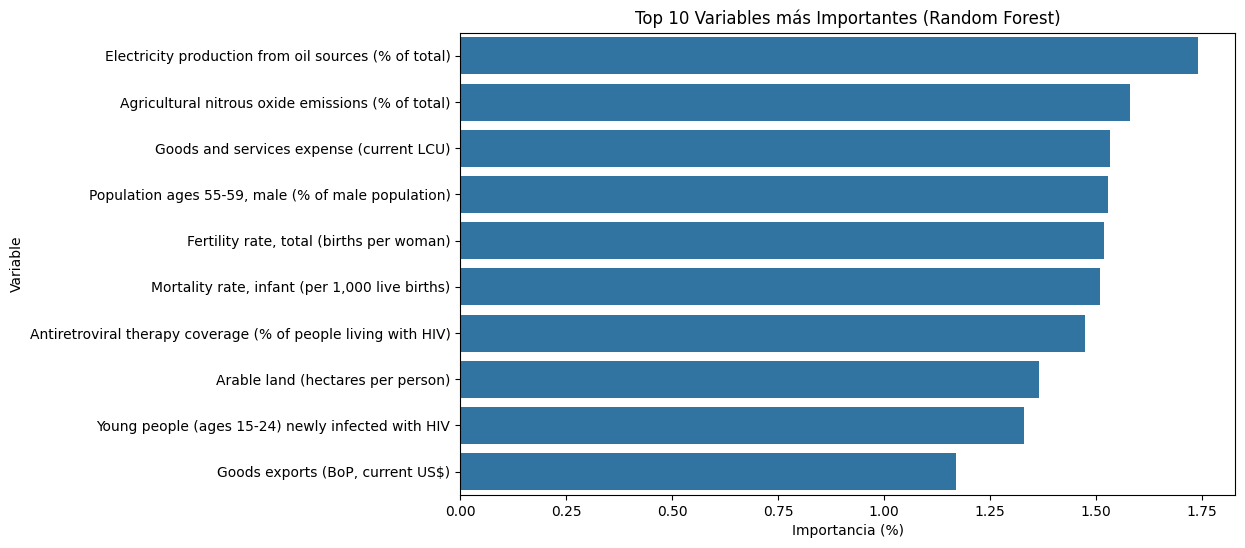

In [24]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes los datos X_train, X_test, y_train, y_test

# Entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Obtener la importancia de las características
feature_importance = rf_model.feature_importances_

# Crear un DataFrame para mostrar la importancia
rf_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia (%)': feature_importance * 100
})

# Mostrar el top 10 de la tabla ordenada por importancia
top_10_rf_importance_df = rf_importance_df.sort_values(by='Importancia (%)', ascending=False).head(10)
top_30_rf_importance_df = rf_importance_df.sort_values(by='Importancia (%)', ascending=False).head(30)

print(top_10_rf_importance_df)

# Visualizar el top 10 de la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia (%)', y='Variable', data=top_10_rf_importance_df)
plt.title('Top 10 Variables más Importantes (Random Forest)')
plt.xlabel('Importancia (%)')
plt.ylabel('Variable')
plt.show()


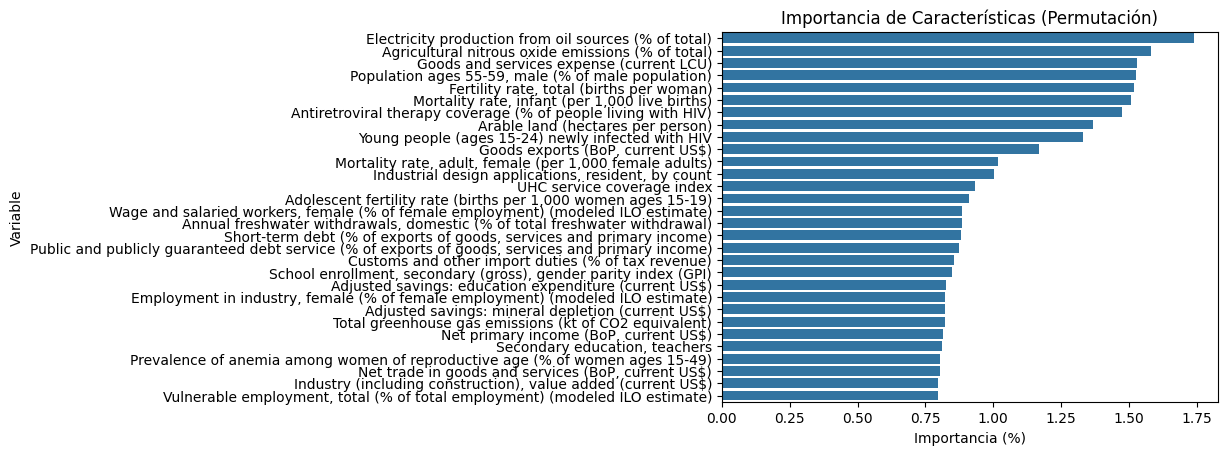

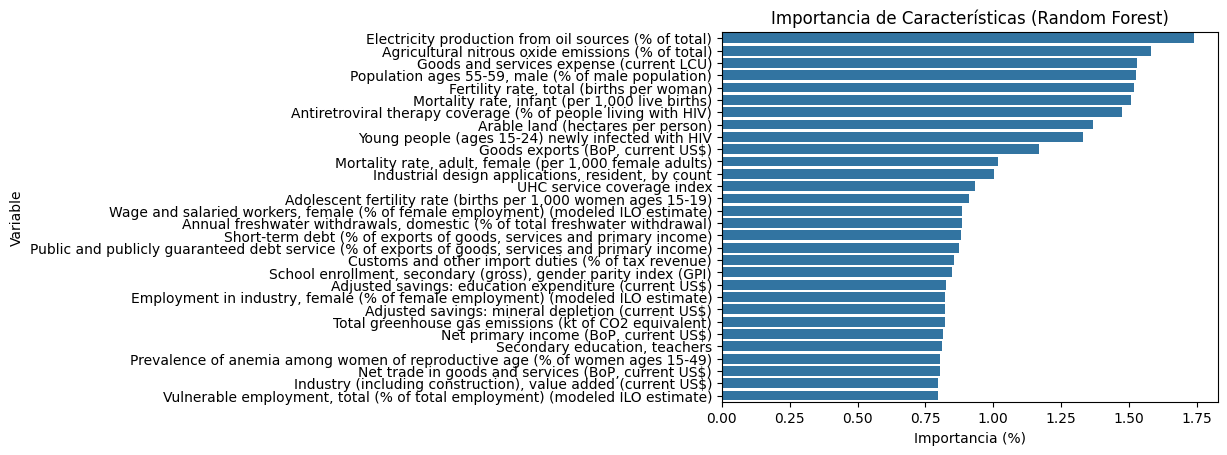

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización para la importancia de características (Permutación)
sns.barplot(x='Importancia (%)', y='Variable', data=top_30_rf_importance_df)
plt.title('Importancia de Características (Permutación)')
plt.show()

# Visualización para la importancia de características de Random Forest
sns.barplot(x='Importancia (%)', y='Variable', data=top_30_rf_importance_df)
plt.title('Importancia de Características (Random Forest)')
plt.show()
